# **MLG Project by Navaneeth and Rahul**

# **Topic: Predicting crop damage using different Machine Learning Models**

## **Importing Libraries**

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

# **Importing the crop datasets**

In [ ]:
#Loading the dataset
df_train=pd.read_csv("/content/train_data.csv")
df_train["source"]="train"
df_test=pd.read_excel("/content/test_data.xlsx")
df_test["source"]="test"
df=df_train
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,source
0,F00000001,188,1,0,1,0,0.0,0,1,0,train
1,F00000003,209,1,0,1,0,0.0,0,2,1,train
2,F00000004,257,1,0,1,0,0.0,0,2,1,train
3,F00000005,257,1,1,1,0,0.0,0,2,1,train
4,F00000006,342,1,0,1,0,0.0,0,2,1,train


# **Dataset Information and Standard Statistics**

In [ ]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
 10  source                   88858 non-null  object 
dtypes: float64(1), int64(8), object(2)
memory usage: 7.5+ MB


In [ ]:
df.shape

(88858, 11)

# **Cleaning the data to fix missing values**

In [ ]:
#Check for total number of Null (missing) values
df.isnull().sum() 

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
source                        0
dtype: int64

In [ ]:
#Replacing missing values with mean of the data .
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean(), inplace=True)

In [ ]:
# Verifying if Null values have been eliminated
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
source                     0
dtype: int64

# **Finding Correlations to find useful features and ignore irrelevant features for model building**

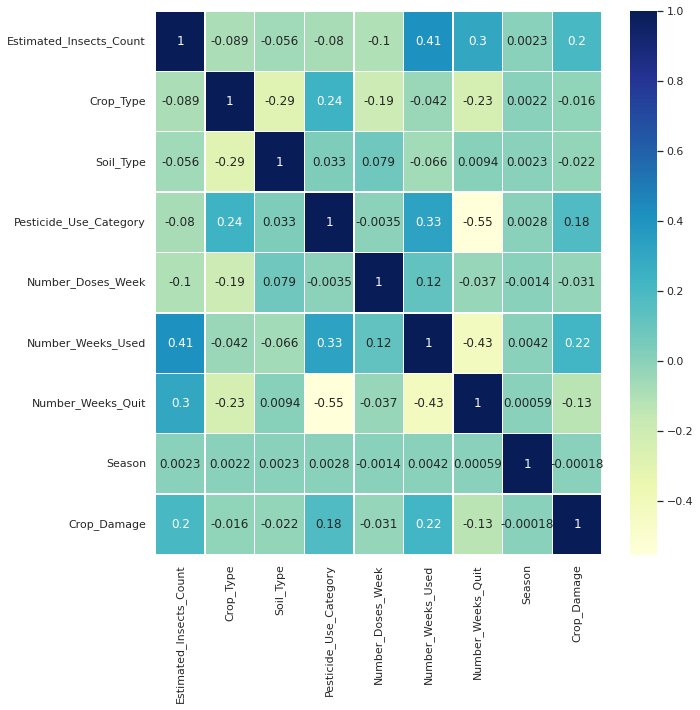

In [ ]:
#Checking Correlation using heatmap

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu', linewidths=.5)

## **Observation:**

    1.Estimated_Insects_count,Pesticide_use_category and Number_weeks_used are positively correlated with Crop damage.
    
    2.Number_weeks_used  is positively correlated with Estimated_Insects_count and Pesticide_use_category. 

# **Crop Damage class analysis**

<Figure size 864x360 with 0 Axes>

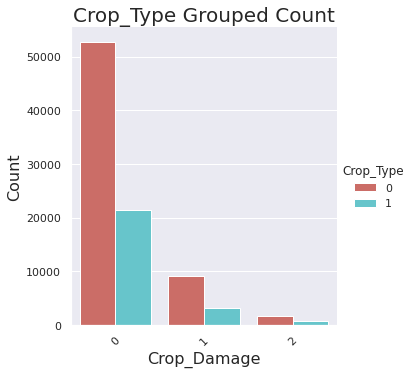

In [ ]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Damage', data=df, palette="hls",kind='count',hue='Crop_Type')
plt.xlabel("Crop_Damage", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crop_Type Grouped Count", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Observations:
    
    1. Crop damage due to pesticides are less in comparison to damage due to other causes.
    2. Crop type 0 has higher chance of survival compared to crop type 1.

Text(0.5, 1.0, 'Crop Damage vs Pesticide Use Category ')

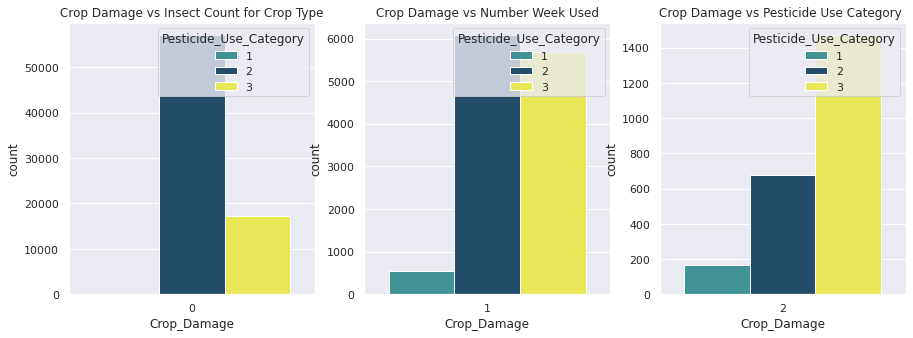

In [ ]:
sns.set_theme(style="darkgrid")
fig, [ax1,ax2,ax3] = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==0],ax=ax1,palette=['#34a0a4',"#184e77","#ffff3f"])
ax1.set_title("Crop Damage vs Insect Count for Crop Type")
ax2=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==1],ax=ax2,palette=['#34a0a4',"#184e77","#ffff3f"])
ax2.set_title("Crop Damage vs Number Week Used")
ax3=sns.countplot(x="Crop_Damage" ,hue="Pesticide_Use_Category",data=df[df["Crop_Damage"]==2],ax=ax3,palette=['#34a0a4',"#184e77","#ffff3f"])
ax3.set_title("Crop Damage vs Pesticide Use Category ")

# **Observations:** 
1. Type 2 pesticide is much better solution to reduce insect related damage 
2. Type 3 pesticide gives most pesticide related damage to crops. 

## Bivariate Analysis

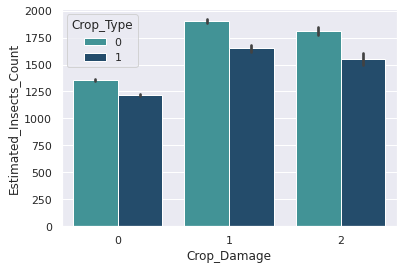

In [ ]:
sns.barplot(x="Crop_Damage" ,y="Estimated_Insects_Count",hue="Crop_Type",data=df,palette=['#34a0a4',"#184e77","#ffff3f"])

##### Observations: 
1. Clearly observed that Most insect attacks are done on crop type 0.

<Figure size 864x360 with 0 Axes>

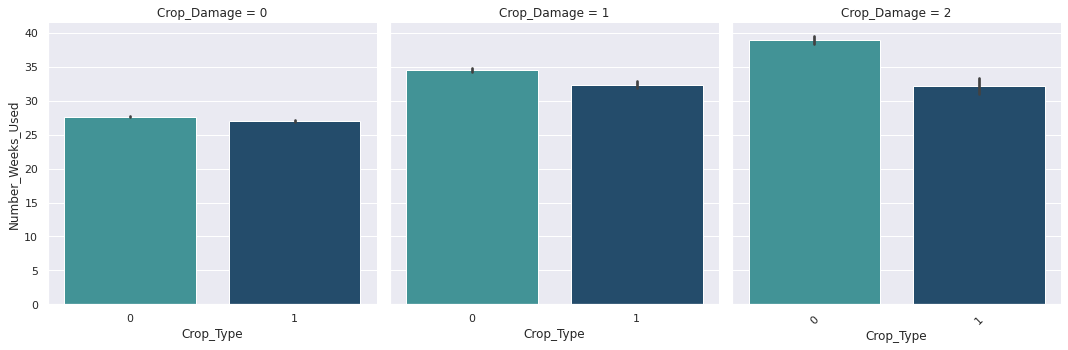

In [ ]:
plt.figure(figsize=(12,5))
sns.catplot(x='Crop_Type',y='Number_Weeks_Used', data=df,kind='bar',col='Crop_Damage',palette=['#34a0a4',"#184e77","#ffff3f"])
plt.xticks(rotation=45)
plt.show()

##### Observations:
1. Crop Type 0 is more vulnerable to pesticide related and other damages as compared to Type1
2. Avg. duration of pesticide related damage is lower for Crop type 1. 

## **Skew Analysis - to check if dataset values are skewed or not**

In [ ]:
df.skew()

Estimated_Insects_Count    0.839146
Crop_Type                  0.955978
Soil_Type                  0.166914
Pesticide_Use_Category     0.779488
Number_Doses_Week          0.962879
Number_Weeks_Used          0.258007
Number_Weeks_Quit          0.892773
Season                     0.145228
Crop_Damage                2.367816
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fbd07b290>,
      dtype=object)

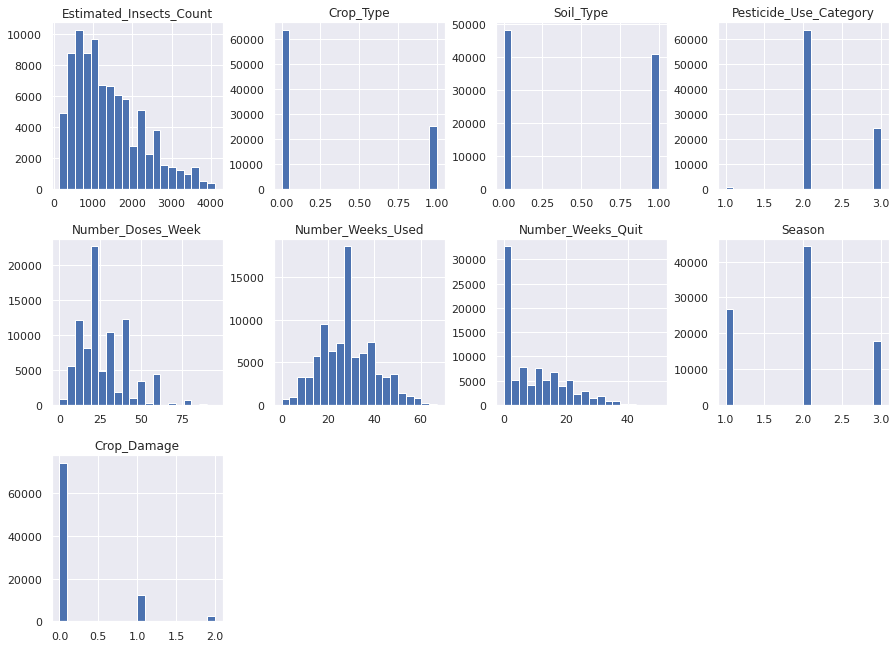

In [ ]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)
    

# **Observations:**
    
    1. We can see that all the data is normally distributed. 
    

# **Model Building**

In [ ]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

# **Depenedent and Independent feature extraction from dataset**

In [ ]:
# Dropping region and Day from x for classifcation dataset
#Assigning the value of x for testing and training
df_xc=df.drop(columns=['Crop_Damage','ID','source'])
yc=df[["Crop_Damage"]]

# **Scaling the dependent features**

In [ ]:
#Bring every column to common scale by using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xc = sc.fit_transform(df_xc)
df_xc=pd.DataFrame(xc,columns=df_xc.columns)

# **Training multiple models to choose the best**

In [ ]:
classification_model = [] # stores the name of algorithm used
accuracy = []  # stores their respective accuracies

In [ ]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 
models=[]
models.append(('Logistic Reg',LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

for names,model_c in models:
    x_train,x_test,y_train,y_test = train_test_split(df_xc,yc,random_state = 42,test_size = 0.33,stratify = yc)
    model_c.fit(x_train,y_train)
    y_pred = model_c.predict(x_test)
    accuracy_scr = accuracy_score(y_test,y_pred)
    classification_model.append(names)
    accuracy.append(accuracy_scr)
    print("Model : "+names,"accuracy score : " + str(accuracy_scr))

Model : Logistic Reg accuracy score : 0.8332764970672487
Model : Random Forest accuracy score : 0.8245123448369935
Model : KNN accuracy score : 0.8280248260810258
Model : Decision Tree Classifier accuracy score : 0.748806438412222


# **Comparing various classification algorithms**

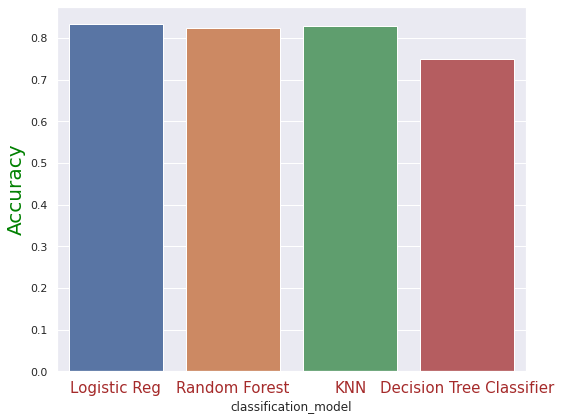

In [ ]:
test_accuracy_df = pd.DataFrame({"classification_model": classification_model , "Accuracy" : accuracy })
# test_accuracy_df
plt.figure(figsize = (8 , 6 ))
plt.grid(True)
sns.barplot(x = "classification_model" , y = "Accuracy" , data = test_accuracy_df)
plt.xticks(color = "brown" , fontsize = 15 )
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.tight_layout()
plt.savefig("first_analysis.png")
plt.show() 

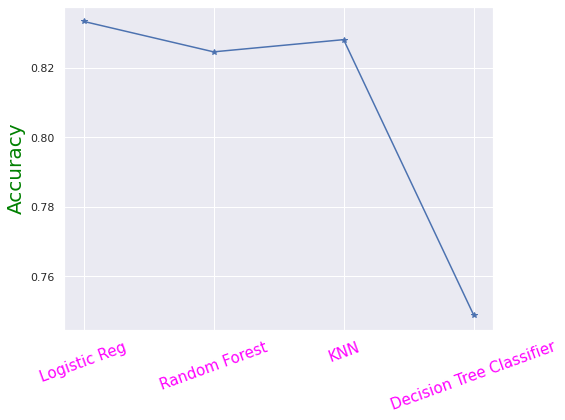

In [ ]:
plt.figure(figsize = (8 , 6 ))
plt.grid(True)
plt.plot(classification_model , accuracy , marker = "*")
plt.ylabel("Accuracy" , color = "green" ,  fontsize = 20)
plt.xticks(color = "magenta" , fontsize = 15 , rotation = 20 )
plt.tight_layout()
plt.savefig("second_analysis.png")
plt.show()

# **Observations:**
Logistic Regression Model has the best performance accuracy score of 83.6%.
Decision Tree Classifier is the worst performer with 74% accuracy.

# **Checking how good our worst model (decision tree) can perform with hyperparameter improvements**

In [ ]:

m1 = DecisionTreeClassifier()
m1.fit(x_train,y_train)
y_p1 = m1.predict(x_test)
ac_score1 = accuracy_score(y_test,y_pred)
print(ac_score1)

0.748806438412222


In [ ]:

m2 = DecisionTreeClassifier(max_depth=3)
m2.fit(x_train,y_train)
y_p2 = m2.predict(x_test)
ac_score2 = accuracy_score(y_test,y_pred)
print(ac_score2)

0.748806438412222


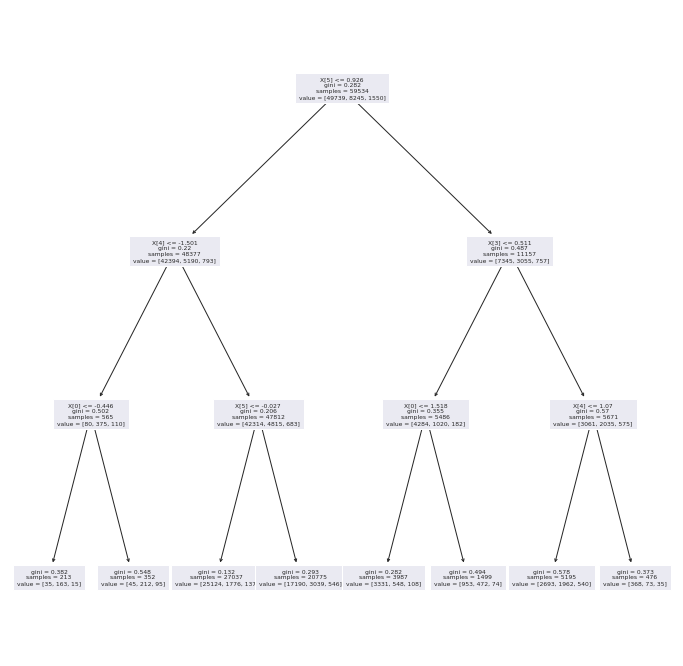

In [ ]:
plot_tree(m2,fontsize = 6)
fig = plt.gcf()
fig.set_size_inches(12, 12)
fig.savefig('dec_tree_m2.png')

In [ ]:
m3 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=8)
m3.fit(x_train,y_train)
y_p3 = m3.predict(x_test)
ac_score3 = accuracy_score(y_test,y_pred)
print(ac_score3)

0.841836038739599


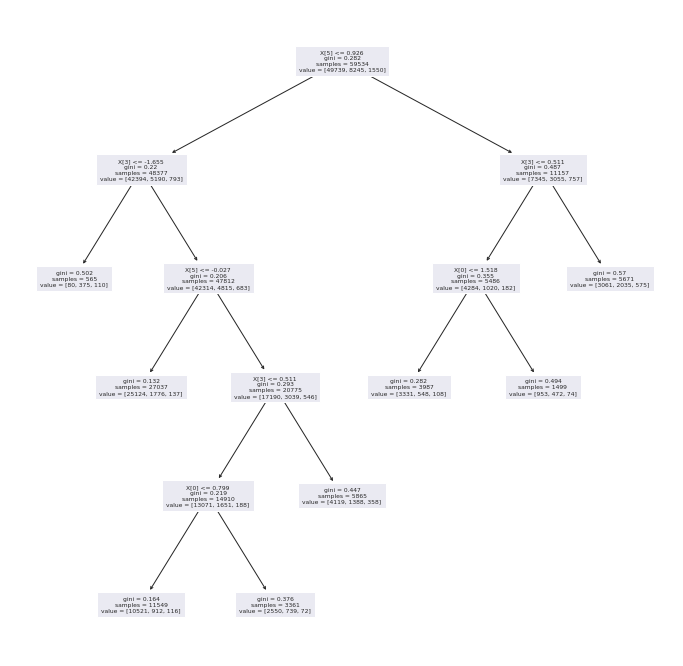

In [ ]:
plot_tree(m3,fontsize = 6)
fig = plt.gcf()
fig.set_size_inches(12, 12)
fig.savefig('dec_tree_m4.png')

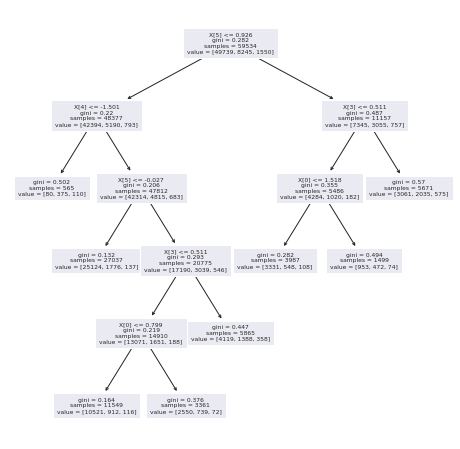

In [ ]:
import matplotlib.pyplot as plt
plot_tree(m3,fontsize = 6)
fig = plt.gcf()
fig.set_size_inches(8, 8)
fig.savefig('dec_tree_m3.png')

In [ ]:

m4 = DecisionTreeClassifier(criterion="entropy",max_depth = 10)
m4.fit(x_train,y_train)
y_p4 = model_c.predict(x_test)
ac_score4 = accuracy_score(y_test,y_pred)
print(ac_score4)

0.748806438412222


# with max_depth = 10 we are able to achieve almost same accuracy as our best model which is the logistic regression model

# **Logistic regression performance measures**

accuracy score is :  0.8332764970672487
classification report 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91     24499
           1       0.40      0.05      0.09      4062
           2       0.00      0.00      0.00       763

    accuracy                           0.83     29324
   macro avg       0.41      0.35      0.33     29324
weighted avg       0.76      0.83      0.77     29324



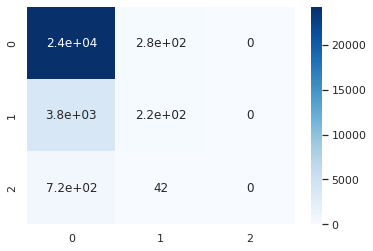

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)
print("accuracy score is : ",accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap = "Blues")
print("classification report \n",classification_report(y_test,y_pred))

In [ ]:
# random val predict
y_rand = log_reg.predict(sc.transform([[410, 0, 0, 3, 35, 21, 0, 2]]))
y_rand
y_rand_7 = log_reg.predict_proba(sc.transform([[7, 0, 2, 3, 50, 0, 0, 1]]))
print(y_rand_7)

[[0.90945136 0.07276818 0.01778046]]


# **Observations:**

    1.Due to abnormal distribution of data point -model is highly accurate in predicting no crop damage but needs 
    improvement in predicting pesticide crop damage.

# **Checking Performance measures of k-Nearest-Neighbors Algorithm**

accuracy score is :  0.841836038739599
classification report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     24499
           1       0.50      0.17      0.26      4062
           2       0.06      0.00      0.00       763

    accuracy                           0.84     29324
   macro avg       0.47      0.38      0.39     29324
weighted avg       0.79      0.84      0.80     29324



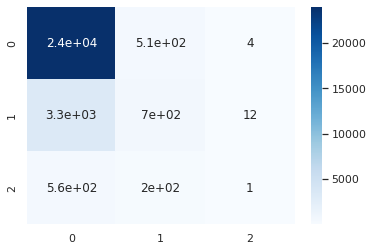

In [ ]:
kmeans = KNeighborsClassifier(n_neighbors=23)
kmeans.fit(x_train,y_train)
y_pred = kmeans.predict(x_test)
print("accuracy score is : ",accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap = "Blues")
print("classification report \n",classification_report(y_test,y_pred))

# **Checking Performance measures of Random-Forest Algorithm**

accuracy score is :  0.8255694993861683
classification report 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     24499
           1       0.40      0.20      0.27      4062
           2       0.15      0.06      0.08       763

    accuracy                           0.83     29324
   macro avg       0.47      0.40      0.42     29324
weighted avg       0.78      0.83      0.80     29324



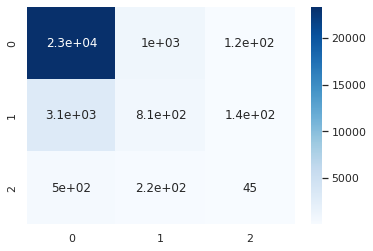

In [ ]:
rforest = RandomForestClassifier()
rforest.fit(x_train,y_train)
y_pred = rforest.predict(x_test)
print("accuracy score is : ",accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap = "Blues")
print("classification report \n",classification_report(y_test,y_pred))

# **Using ensemble learning** 

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test = train_test_split(df_xc,yc,random_state = 42,test_size = 0.33,stratify = yc)

model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier(n_neighbors=10)

model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('rf', model3),('kn', model4)], voting='hard')

model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8391078979675352